# Credit Risk Classification Project


## Dataset Summary
The dataset includes a range of personal and financial attributes from loan applicants, such as:

- Age
- Credit amount
- Duration of the loan
- Checking and savings account status
- Employment status
- Purpose of the loan
- Credit history
- Property ownership
- And more

The target variable is:
- `class`: whether the applicant is a **good** or **bad** credit risk.


## Project Workflow

1. **Data Cleaning & Preprocessing**
   - Handled missing values
   - Encoded categorical variables using LabelEncoder
2. **Feature Engineering**
   - Selected relevant features
   - Split dataset into train/test
3. **Model Training**
   - Trained and evaluated two models: **Logistic Regression** and **Random Forest**
4. **Model Evaluation**
   - Evaluated using accuracy, confusion matrix, and classification report
5. **Feature Importance**
   - Analyzed most influential features from Random Forest
6. *(Optional)* Hyperparameter Tuning
7. *(Optional)* Model Saving (for future use or deployment)

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  
# metadata 
print(statlog_german_credit_data.metadata) 
  
# variable information 
print(statlog_german_credit_data.variables) 


{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [2]:
import pandas as pd

# Combine features and target into a single DataFrame
df = pd.concat([X, y], axis=1)

# Peek at the first few rows
df.head()


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
df['class'].value_counts()

1    700
2    300
Name: class, dtype: int64

In [5]:
print(statlog_german_credit_data.variables)


           name     role         type     demographic  \
0    Attribute1  Feature  Categorical            None   
1    Attribute2  Feature      Integer            None   
2    Attribute3  Feature  Categorical            None   
3    Attribute4  Feature  Categorical            None   
4    Attribute5  Feature      Integer            None   
5    Attribute6  Feature  Categorical            None   
6    Attribute7  Feature  Categorical           Other   
7    Attribute8  Feature      Integer            None   
8    Attribute9  Feature  Categorical  Marital Status   
9   Attribute10  Feature  Categorical            None   
10  Attribute11  Feature      Integer            None   
11  Attribute12  Feature  Categorical            None   
12  Attribute13  Feature      Integer             Age   
13  Attribute14  Feature  Categorical            None   
14  Attribute15  Feature  Categorical           Other   
15  Attribute16  Feature      Integer            None   
16  Attribute17  Feature  Categ

In [6]:
df.columns = [
    'checking_status', 'duration_months', 'credit_history', 'purpose', 'credit_amount',
    'savings_account', 'employment', 'installment_rate', 'personal_status_sex', 'other_debtors',
    'residence_since', 'property', 'age', 'other_installment_plans', 'housing',
    'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker', 'class'
]


In [7]:
df

,checking_status,duration_months,credit_history,purpose,credit_amount,savings_account,employment,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [9]:
print(df.shape)       # should be (1000, 21)
print(df.dtypes)      # see which columns are categorical vs numerical
df.head()             # view first few rows


(1000, 21)
checking_status            object
duration_months             int64
credit_history             object
purpose                    object
credit_amount               int64
savings_account            object
employment                 object
installment_rate            int64
personal_status_sex        object
other_debtors              object
residence_since             int64
property                   object
age                         int64
other_installment_plans    object
housing                    object
existing_credits            int64
job                        object
num_dependents              int64
own_telephone              object
foreign_worker             object
class                       int64
dtype: object


,checking_status,duration_months,credit_history,purpose,credit_amount,savings_account,employment,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [10]:
df.isnull().sum()

checking_status            0
duration_months            0
credit_history             0
purpose                    0
credit_amount              0
savings_account            0
employment                 0
installment_rate           0
personal_status_sex        0
other_debtors              0
residence_since            0
property                   0
age                        0
other_installment_plans    0
housing                    0
existing_credits           0
job                        0
num_dependents             0
own_telephone              0
foreign_worker             0
class                      0
dtype: int64

In [11]:
df['class'].value_counts()

1    700
2    300
Name: class, dtype: int64

In [12]:
df['class'] = df['class'].map({1: 1, 2: 0})  # 1 = good, 0 = bad

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [14]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('class', axis=1)
y = df['class']

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=1000)

# Fit to the training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.77
Confusion Matrix:
 [[ 27  32]
 [ 14 127]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.46      0.54        59
           1       0.80      0.90      0.85       141

    accuracy                           0.77       200
   macro avg       0.73      0.68      0.69       200
weighted avg       0.76      0.77      0.76       200



In [ ]:
# Using another model (Random Forest)

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.805
Confusion Matrix:
 [[ 31  28]
 [ 11 130]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.53      0.61        59
           1       0.82      0.92      0.87       141

    accuracy                           0.81       200
   macro avg       0.78      0.72      0.74       200
weighted avg       0.80      0.81      0.79       200



In [18]:
# feature Importance:

# Seeing which features are most predictive:


import pandas as pd
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).head(10)

credit_amount      0.131240
age                0.104386
checking_status    0.103118
duration_months    0.095828
purpose            0.066581
credit_history     0.061481
employment         0.055956
savings_account    0.049017
property           0.047091
residence_since    0.043563
dtype: float64

In [19]:
# Next & Final Steps (Choosing what to add):

# 1. Hyperparameter Tuning (Improve Accuracy) Use GridSearchCV or RandomizedSearchCV to fine-tune your Random Forest:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Params:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))


Best Params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.76


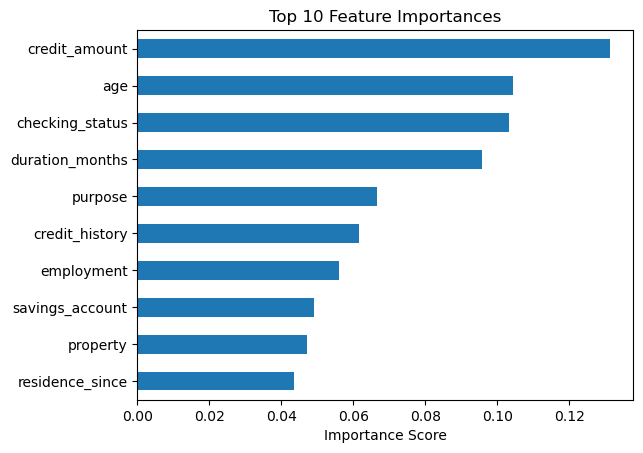

In [20]:
# Visualize Feature Importances (Better Presentation)

import matplotlib.pyplot as plt

feature_importance.sort_values(ascending=True).tail(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.show()

## Final Results

- **Best Model:** Random Forest Classifier
- **Accuracy:** 80.5%
- **Top Features:**
  - `credit_amount`
  - `checking_status`
  - `duration_months`
  - `age`
  - `purpose`

## Conclusion

The Random Forest model performed better than Logistic Regression in predicting credit risk, achieving an accuracy of over 80%. The most important features influencing the prediction were credit amount, checking account status, and loan duration. 

This model can be used as a starting point for building automated loan approval systems, flagging high-risk applicants, and improving lending strategies.